In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

driver_df=pd.read_csv('driver-data.csv')
driver_df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


# Inference
This data set is collected to analyse the average percentage of the driver who has over sped.

In [2]:
driver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
driver_df_no_id=driver_df.drop('id',axis=1)
driver_df_no_id

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


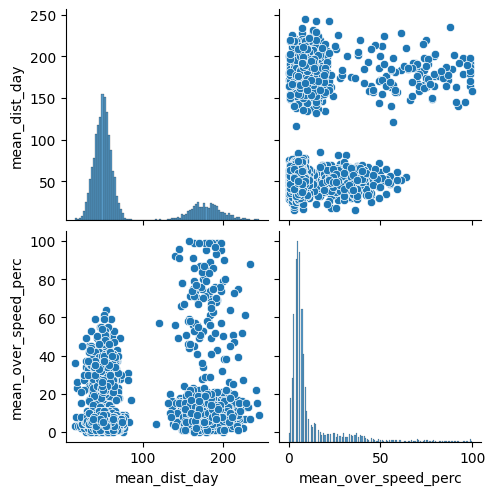

In [7]:
sns.pairplot(driver_df_no_id)

## K-means Clustering

In [5]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=2,verbose=1)

In [8]:
kmeans_model.fit(driver_df_no_id)

Initialization complete
Iteration 0, inertia 1560678.7511000007.
Iteration 1, inertia 1316427.5394861735.
Converged at iteration 1: center shift 0.007057813898013044 within tolerance 0.15230782662034964.


KMeans(n_clusters=2, verbose=1)

In [10]:
print("Centroid co-ordinates of the clusters are: ", kmeans_model.cluster_centers_)

Centroid co-ordinates of the clusters are:  [[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [12]:
print("Cluster labels for the points in dataset: " , kmeans_model.labels_)

Cluster labels for the points in dataset:  [0 0 0 ... 1 1 1]


In [13]:
driver_df['Cluster_Labels']=kmeans_model.labels_

In [14]:
driver_df

,id,mean_dist_day,mean_over_speed_perc,Cluster_Labels
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [15]:
driver_df['Cluster_Labels'].value_counts()

Cluster_Labels
0    3200
1     800
Name: count, dtype: int64

#### Visualize the Clusters

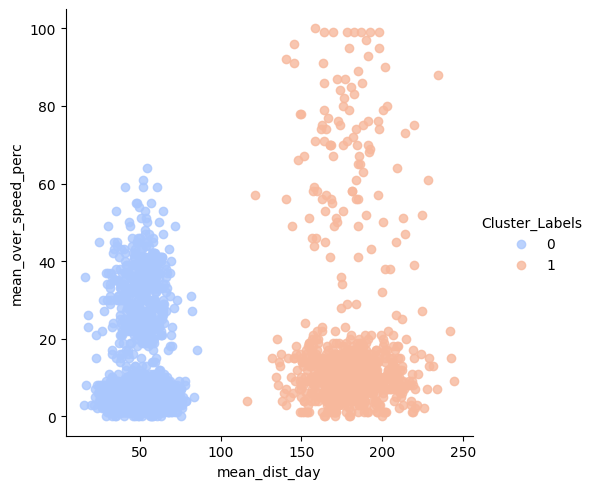

In [18]:
sns.lmplot(x = "mean_dist_day", y = "mean_over_speed_perc", data = driver_df, hue = "Cluster_Labels", 

           palette = "coolwarm", fit_reg = False)

## Elbow method using WCSS (Within Cluster Sum of Squares distance) to identify the ideal number of clusters present in a dataset

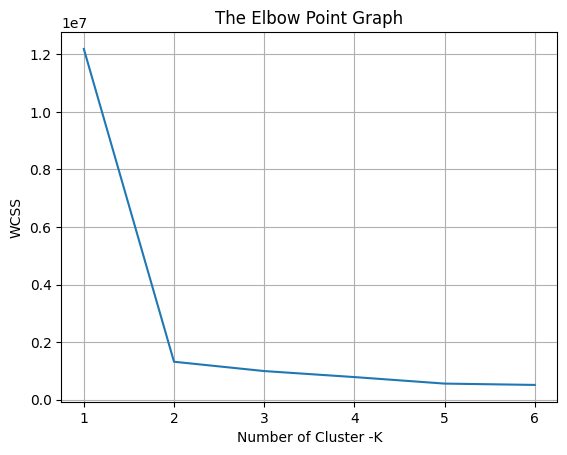

In [20]:
wcss=[]
#I want to know the ideal k value(number of clusters) between the range 1 to 7
for i in range(1,7):
    Kmeans_Model=KMeans(n_clusters=i)
    Kmeans_Model.fit(driver_df_no_id)
    wcss.append(Kmeans_Model.inertia_)

#Plotting the elbow graph
plt.plot(range(1,7),wcss)
plt.grid()
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Cluster -K")
plt.ylabel("WCSS")
plt.show()

# Inference
This Elbow method using WCSS proves that 2 is the appropriate K value that can be used for our K-Means Clustering. When the K-value increases the WCSS decreases as the more partitioning the less size partition will hold. 